Gradient Descent: Min: [0. 0.], Obj: 9.0, Iterations: 1, Time: 0.000616s
Newton's Method: Min: [0. 0.], Obj: 9.0, Iterations: 1, Time: 0.003228s


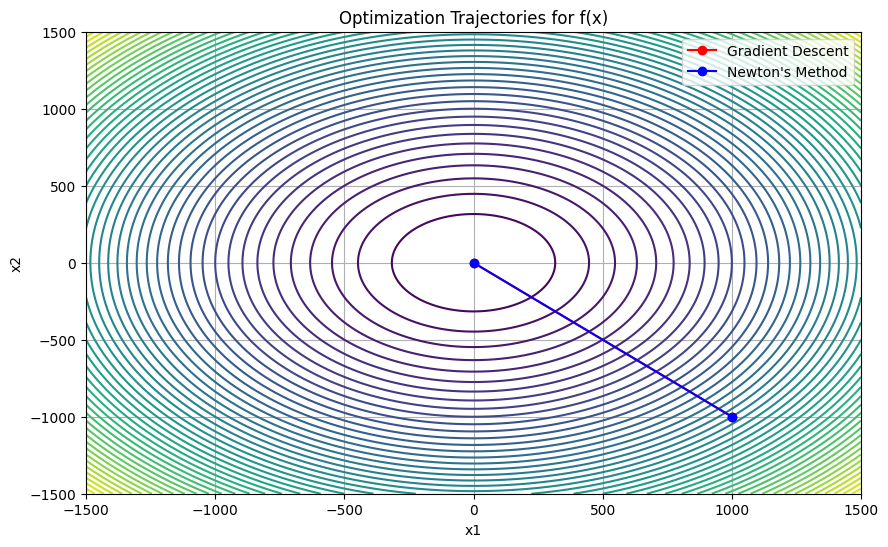

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define function f(x) and its gradient
def f(x):
    return x[0]**2 + x[1]**2 + 9

def grad_f(x):
    return np.array([2*x[0], 2*x[1]])

def hessian_f(x):
    return np.array([[2, 0], [0, 2]])

# Gradient Descent with Exact Line Search
def gradient_descent_exact_line_search(func, grad_func, x0, tau, max_iter=10000):
    x = x0
    trajectory = [x]
    k = 0
    while np.linalg.norm(grad_func(x)) > tau and k < max_iter:
        p = -grad_func(x)
        # Exact line search
        eta = -np.dot(p, grad_func(x)) / np.dot(p, 2 * p)
        x = x + eta * p
        trajectory.append(x)
        k += 1
    return x, func(x), k, np.array(trajectory)

# Newton's Method
def newton_method(func, grad_func, hessian_func, x0, tau, max_iter=10000):
    x = x0
    trajectory = [x]
    k = 0
    while np.linalg.norm(grad_func(x)) > tau and k < max_iter:
        hessian_inv = np.linalg.inv(hessian_func(x))
        x = x - hessian_inv @ grad_func(x)
        trajectory.append(x)
        k += 1
    return x, func(x), k, np.array(trajectory)

# Parameters
tau = 1e-15
x0 = np.array([1000.0, -1000.0])

# Run Gradient Descent
start_time = time.time()
x_min_gd, f_min_gd, iter_gd, traj_gd = gradient_descent_exact_line_search(f, grad_f, x0, tau)
gd_time = time.time() - start_time

# Run Newton's Method
start_time = time.time()
x_min_nm, f_min_nm, iter_nm, traj_nm = newton_method(f, grad_f, hessian_f, x0, tau)
nm_time = time.time() - start_time

# Results
print(f"Gradient Descent: Min: {x_min_gd}, Obj: {f_min_gd}, Iterations: {iter_gd}, Time: {gd_time:.6f}s")
print(f"Newton's Method: Min: {x_min_nm}, Obj: {f_min_nm}, Iterations: {iter_nm}, Time: {nm_time:.6f}s")

# Plot trajectories
x1 = np.linspace(-1500, 1500, 400)
x2 = np.linspace(-1500, 1500, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2])

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.plot(traj_gd[:, 0], traj_gd[:, 1], 'r-o', label="Gradient Descent")
plt.plot(traj_nm[:, 0], traj_nm[:, 1], 'b-o', label="Newton's Method")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Optimization Trajectories for f(x)")
plt.grid()
plt.show()
